# Millimeter-wave Dielectric properties

There are several conventions for specifying, or working with, millimeter-wave properties of materials.  Let's start with the summary given by James Lamb ("Miscellaneous data on materials for millimetre and submillimetre optics"),
which begins with the complex dielectric constant,<br>

$$ \hat{\epsilon} = \epsilon' + i \epsilon'' .$$

The complex index of refraction, 

$$ \hat{n} = n + i k $$

can also be used;  note that $k$ here is a dimensionless number, not the wavenumber of electromagnetic wave.  Solving for power absorption using $\hat{n}$ leads to the power absorption coefficient,

$$\alpha = 4 \pi \nu k / c , $$

which has units of inverse lenth;  that is, the power of a wave travelling in the +z direction falls as 

$$ P(z) = P_0 e^{-\alpha z} .$$

The units of $\alpha$ for millimeter-wave materials are usually given as cm$^{-1}$, or Nepers/cm, where 1 Neper = 4.34dB corresponds to a power loss of 1/e.


$\hat{n}$ and $\hat{\epsilon}$ are related 
(for non-magnetic materials) by the relations

$$ \epsilon' = n^2 - k^2 , $$
$$ \epsilon'' = 2 n k .$$

With a little algebra these can be rearranged to solve for $n$ and $k$,

$$ k^2 = \frac{1}{2} \left( -\epsilon' + \sqrt{\epsilon'^2 + \epsilon''^2}\right) ,$$

$$ n^2 = \frac{1}{2} \left( \epsilon' + \sqrt{\epsilon'^2 + \epsilon''^2}\right) .$$

The loss tangent,

$$ \tan(\delta) = \epsilon''/\epsilon' $$

is often used to characterize the loss in materials.  For low-loss materials (k << n),

$$ \tan(\delta) = 2 k/n = (\alpha c)/(2 \pi n \nu) , $$
$$ \epsilon' = n^2 .$$

Given a material thickness, and some combination of these parameters that will allow us to calculate $n$ and $\alpha$, we can calculate the reflection, tranmission, and absorption in a given slab of material.

Lamb's compilation give us (n, tan(delta)) for a variety of low loss materials.  Halpern, Gush, and Wishnow and DeCosmo (Applied Optics, V25, No 4, 1986) give (n,alpha).  Petroff etal (https://arxiv.org/pdf/1808.00820.pdf) give ($\epsilon'$, $\epsilon''$).  Therefore, it is helpful to be able to work with any combination of these values.


# Working with Lamb's parameterization
Let's start by working with $(n, \tan{\delta})$, as in Lamb.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

c = 3.0e10 # cm/s

#Set up a frequency axis to plot over
nu_ghz = np.arange(20,600)
nu = nu_ghz*1e9

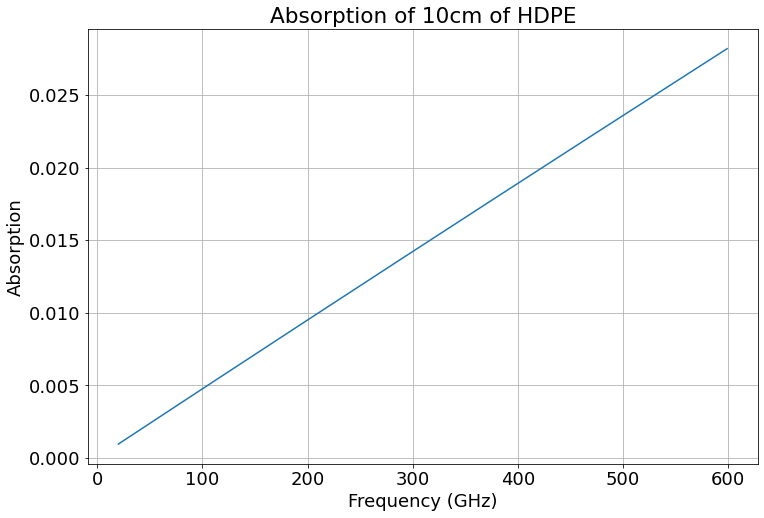

In [10]:
# HDPE, ~300K, in the ~100-300GHz range
# Calculate the absorption of a 3mm thick vacuum window.
n_hdpe = 1.52
tand_hdpe = 3e-4

#thickness
delta_z = .5 # cm

# This looks like a low-loss dielectric, so we can go straight to alpha
alpha = 2*np.pi*nu*n_hdpe*tand_hdpe/c

power = np.exp(-alpha*delta_z)
absorption = 1-power

plt.plot(nu_ghz,absorption)
plt.title('Absorption of 10cm of HDPE')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Absorption')
plt.grid()



From this we can infer that a 3mm thick HDPE vacuum window absorbs less than 1% in "cmb bands".  Notice also that in this low-absorption limit, modeled with a frequency-independent loss tangent, the amount of loss is proportional to frequency.  

One can of course readily modify this calculation to deal with any material in Lamb's tables!

# Halpern etal parameterization

Now let's work with Halpern etal's combination of $(n, \alpha)$.  They actually allow for a frequency dependence of $\alpha = a \nu^b$ cm$^{-1}$, where $\nu$ in this formula is expressed in wavenumbers (or "inverse centimeters", aka icm, the number of wavelengths that fit in 1cm), rather than Hz. 

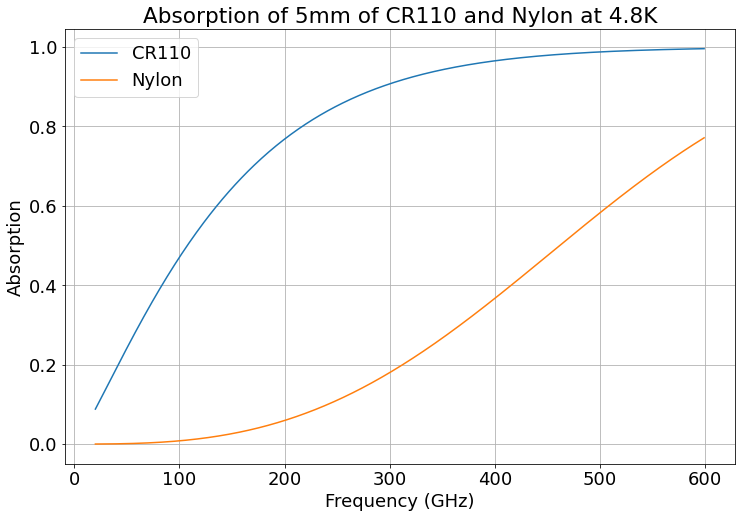

In [11]:
# Eccosorb CR110 and nylon, 5mm thick, at 4.8K.  
# Calculate the loss in traversing that thick of an NDF filter, for example.
#
icm = nu_ghz/30.    # 30GHz corresponds to 1icm, ie one wavelength fits in 1cm.

delta_z = 0.5 # cm, thickness

n_cr110 = 1.88      # Since we are given alpha, n is not needed for this loss calculation.
a_cr110 = 0.3
b_cr110 = 1.2
alpha_cr110 = a_cr110*icm**b_cr110
P_cr110 = np.exp(-alpha_cr110*delta_z)
A_cr110 = 1-P_cr110


a_nylon = 5e-4
b_nylon = 2.9
alpha_nylon = a_nylon*icm**b_nylon
P_nylon = np.exp(-alpha_nylon*delta_z)
A_nylon = 1-P_nylon


plt.plot(nu_ghz,A_cr110,label = 'CR110')
plt.plot(nu_ghz,A_nylon,label = 'Nylon')
plt.title('Absorption of 5mm of CR110 and Nylon at 4.8K')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Absorption')
plt.legend()
plt.grid()

From this we learn that an absorbing NDF will need to be much thicker if it is to work at low frequencies, and that it is not easy to stop "near band" leaks using a nylon filter that is not also somewhat lossy in band, unless you're working below 100GHz, say.

# Complex permability parameterization
Now, let's use the complex permeability, as used by (for example) Petroff etal.

avantra
  Naiive reflection: 0.050
ingeo
  Naiive reflection: 0.063
hips
  Naiive reflection: 0.224
protopasta
  Naiive reflection: 0.384


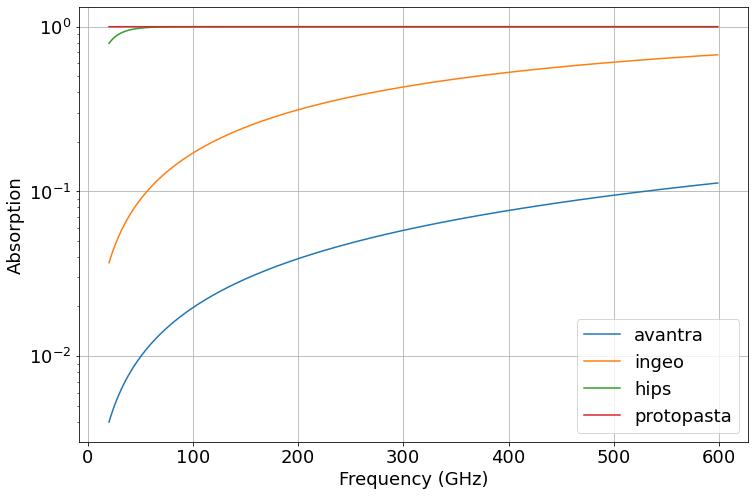

In [13]:
delta_z = 0.5 # cm, thickness

# Let's plot all four 3D printed plastics in Table 2 of Petroff etal.
epsp = {'avantra':2.49, 'ingeo':2.80, 'hips':7.7,'protopasta':15.}
epspp= {'avantra':0.003, 'ingeo':0.03, 'hips':2.1,'protopasta':15.}
names = ['avantra', 'ingeo','hips','protopasta']

for name in names:
    print(name)
    k = np.sqrt((-epsp[name] + np.sqrt(epsp[name]**2 + epspp[name]**2))/2)
    n = np.sqrt(( epsp[name] + np.sqrt(epsp[name]**2 + epspp[name]**2))/2)
    
    # Absorption calculation and plot
    alpha = 4*np.pi*k*nu/c
    P = np.exp(-alpha*delta_z)
    A = 1-P
    plt.semilogy(nu_ghz,A,label=name)
    
    # second abs calc, assumes low loss formula
    #tand = epspp[name]/epsp[name]
    #n = np.sqrt(epsp[name])
    #alpha = 2*np.pi*nu*n*tand/c
    #P = np.exp(-alpha*delta_z)
    #A = 1-P
    #labelstr = name+'v2'
    #plt.semilogy(nu_ghz,A,'--',label=labelstr)
    
    # Reflection calculation, just assuming they act like dielectrics.
    R = ((n-1)/(n+1))**2  
    print('  Naiive reflection: {0:3.3f}'.format(R))
    
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Absorption')
plt.grid()

From this, we see that the HIPS and protopasta (conductive) filaments are very absorbing, if you can manage the sizeable reflections.  Avantra looks like a possibile low-loss option, for printing lenses or things like that.